# Louvain Algorithm in Community Structure Identification

In [ ]:
import numpy as np
import pandas as pd
import random
import time
import matplotlib.pyplot as plt

import networkx as nx
from networkx.algorithms import community
from networkx.drawing.nx_agraph import graphviz_layout
import pygraphviz

from sklearn import metrics

In [ ]:
!gdown -q 1YAgBIOtVInyN7fe-nhZKjihtzWpxtnmg
!unzip -q "subelj_euroroad.zip"

### 2.2. Process data

- File `ent.subelj_euroroad_euroroad.city.name` contains names of cities in the network
- File `out.subelj_euroroad_euroroad` contains the adjacency matrix of the network

In [ ]:
# Read cities' names from files
cities=[]

with open("subelj_euroroad/ent.subelj_euroroad_euroroad.city.name", "r") as f:
  cities = f.read().splitlines()

print("Number of nodes in the network:", len(cities))
cities[:10]

Number of nodes in the network: 1174


['Greenock',
 'Glasgow',
 'Preston',
 'Birmingham',
 'Southampton',
 'Le Havre',
 'Paris',
 'Orléans',
 'Bordeaux',
 'San Sebastián']

In [ ]:
# Read edges from files and apply "name" for them
edges=[]

with open("subelj_euroroad/out.subelj_euroroad_euroroad", "r") as f:
    for edge in f:
        if edge.startswith('%'): continue
        edge = edge.rstrip().split(' ')
        edge = [cities[int(i)-1] for i in edge]
        edges.append(edge)

print("Number of edges in the network:", len(edges))
edges[:10]

Number of edges in the network: 1417


[['Greenock', 'Glasgow'],
 ['Glasgow', 'Preston'],
 ['Glasgow', 'Edinburgh'],
 ['Preston', 'Birmingham'],
 ['Birmingham', 'Southampton'],
 ['Birmingham', 'Cambridge'],
 ['Le Havre', 'Paris'],
 ['Le Havre', 'Amiens'],
 ['Paris', 'Orléans'],
 ['Paris', 'Calais']]

## 3. Implement Louvain algorithm using networkx

### 3.1. Build graph

In [ ]:
# Make Graph
G = nx.Graph()
G.add_edges_from(edges)

In [ ]:
# See vertices as list
nodes = list(G.nodes)
nodes[:10]

['Greenock',
 'Glasgow',
 'Preston',
 'Edinburgh',
 'Birmingham',
 'Southampton',
 'Cambridge',
 'Le Havre',
 'Paris',
 'Amiens']

In [ ]:
# Check directed
G.is_directed()

False

### 3.2. Find best partitions



In [ ]:
start = time.time()
partition = community.louvain_communities(G)
run_time = time.time() - start

print("The Louvain algorithm finished in {}s".format(run_time))
print("The number of group in the network is: ", len(partition))
print("All partitions detected: ")
for p in partition:
  print(p)

The Louvain algorithm finished in 0.17352581024169922s
The number of group in the network is:  46
All partitions detected: 
{'Bonifacio', 'Bastia', 'Porto-Vecchio'}
{'Sassari', 'Porto Torres', 'Cagliari', 'Olbia'}
{'Stavanger', 'Lyngdal', 'Larvik', 'Randaberg', 'Sandefjord', 'Arendal', 'Flekkefjord', 'Rennesøy', 'Mandal', 'Kristiansand', 'Helleland', 'Porsgrunn', 'Sandnes'}
{'Enna', 'Siracusa', 'Catania', 'Mazara del Vallo', 'Messina', 'Gela', 'Palermo', 'Buonfornello'}
{'Landeck', 'Feldkirch', 'Tábor', 'Appenweier', 'Bellinzona', 'Salzburg', 'Gotthard Pass', 'Olten', 'Bad Reichenhall', 'St. Gallen', 'Garmisch-Partenkirchen', 'Liezen', 'Bolzano', 'Donaueschingen', 'Lugano', 'Chur', 'Altenmarkt im Pongau', 'Basel', 'Trento', 'St. Johann in Tirol', 'Braunau am Inn', 'Lindau', 'Lofer', 'Telfs', 'St. Margrethen', 'San Bernardino', 'Imst', 'Remiremont', 'Würzburg', 'Sattledt', 'Stuttgart', 'Offenburg', 'Linz', 'Mittenwald', 'Sankt Pölten', 'Deggendorf', 'Wels', 'Passau', 'Chaumont', 'Seefel

## 3. Implement Louvain algorithm manually

### 3.1. Build graph

In [ ]:
# Define Graph
class Graph:
  def __init___(self, N, matrix):
    self.n = N
    self.matrix = matrix



In [ ]:
# See vertices as list
nodes = list(G.nodes)
nodes[:10]

['Greenock',
 'Glasgow',
 'Preston',
 'Edinburgh',
 'Birmingham',
 'Southampton',
 'Cambridge',
 'Le Havre',
 'Paris',
 'Amiens']

In [ ]:
# Check directed
G.is_directed()

False

### 3.2. Find best partitions



In [ ]:
start = time.time()
partition = community.louvain_communities(G)
run_time = time.time() - start

print("The Louvain algorithm finished in {}s".format(run_time))
print("The number of group in the network is: ", len(partition))
print("All partitions detected: ")
for p in partition:
  print(p)

The Louvain algorithm finished in 0.17352581024169922s
The number of group in the network is:  46
All partitions detected: 
{'Bonifacio', 'Bastia', 'Porto-Vecchio'}
{'Sassari', 'Porto Torres', 'Cagliari', 'Olbia'}
{'Stavanger', 'Lyngdal', 'Larvik', 'Randaberg', 'Sandefjord', 'Arendal', 'Flekkefjord', 'Rennesøy', 'Mandal', 'Kristiansand', 'Helleland', 'Porsgrunn', 'Sandnes'}
{'Enna', 'Siracusa', 'Catania', 'Mazara del Vallo', 'Messina', 'Gela', 'Palermo', 'Buonfornello'}
{'Landeck', 'Feldkirch', 'Tábor', 'Appenweier', 'Bellinzona', 'Salzburg', 'Gotthard Pass', 'Olten', 'Bad Reichenhall', 'St. Gallen', 'Garmisch-Partenkirchen', 'Liezen', 'Bolzano', 'Donaueschingen', 'Lugano', 'Chur', 'Altenmarkt im Pongau', 'Basel', 'Trento', 'St. Johann in Tirol', 'Braunau am Inn', 'Lindau', 'Lofer', 'Telfs', 'St. Margrethen', 'San Bernardino', 'Imst', 'Remiremont', 'Würzburg', 'Sattledt', 'Stuttgart', 'Offenburg', 'Linz', 'Mittenwald', 'Sankt Pölten', 'Deggendorf', 'Wels', 'Passau', 'Chaumont', 'Seefel

## 5. Visualize the community

In [ ]:
# Add color for the community
node_mapping = {}
map_v = 0
for node in G.nodes():
  node_mapping[node] = map_v
  map_v += 1

color_list_community = [[] for i in range(len(G.nodes()))]

for i in G.nodes():
  for j, p in enumerate(partition):
    if i in p:
      color_list_community[node_mapping[i]] = j

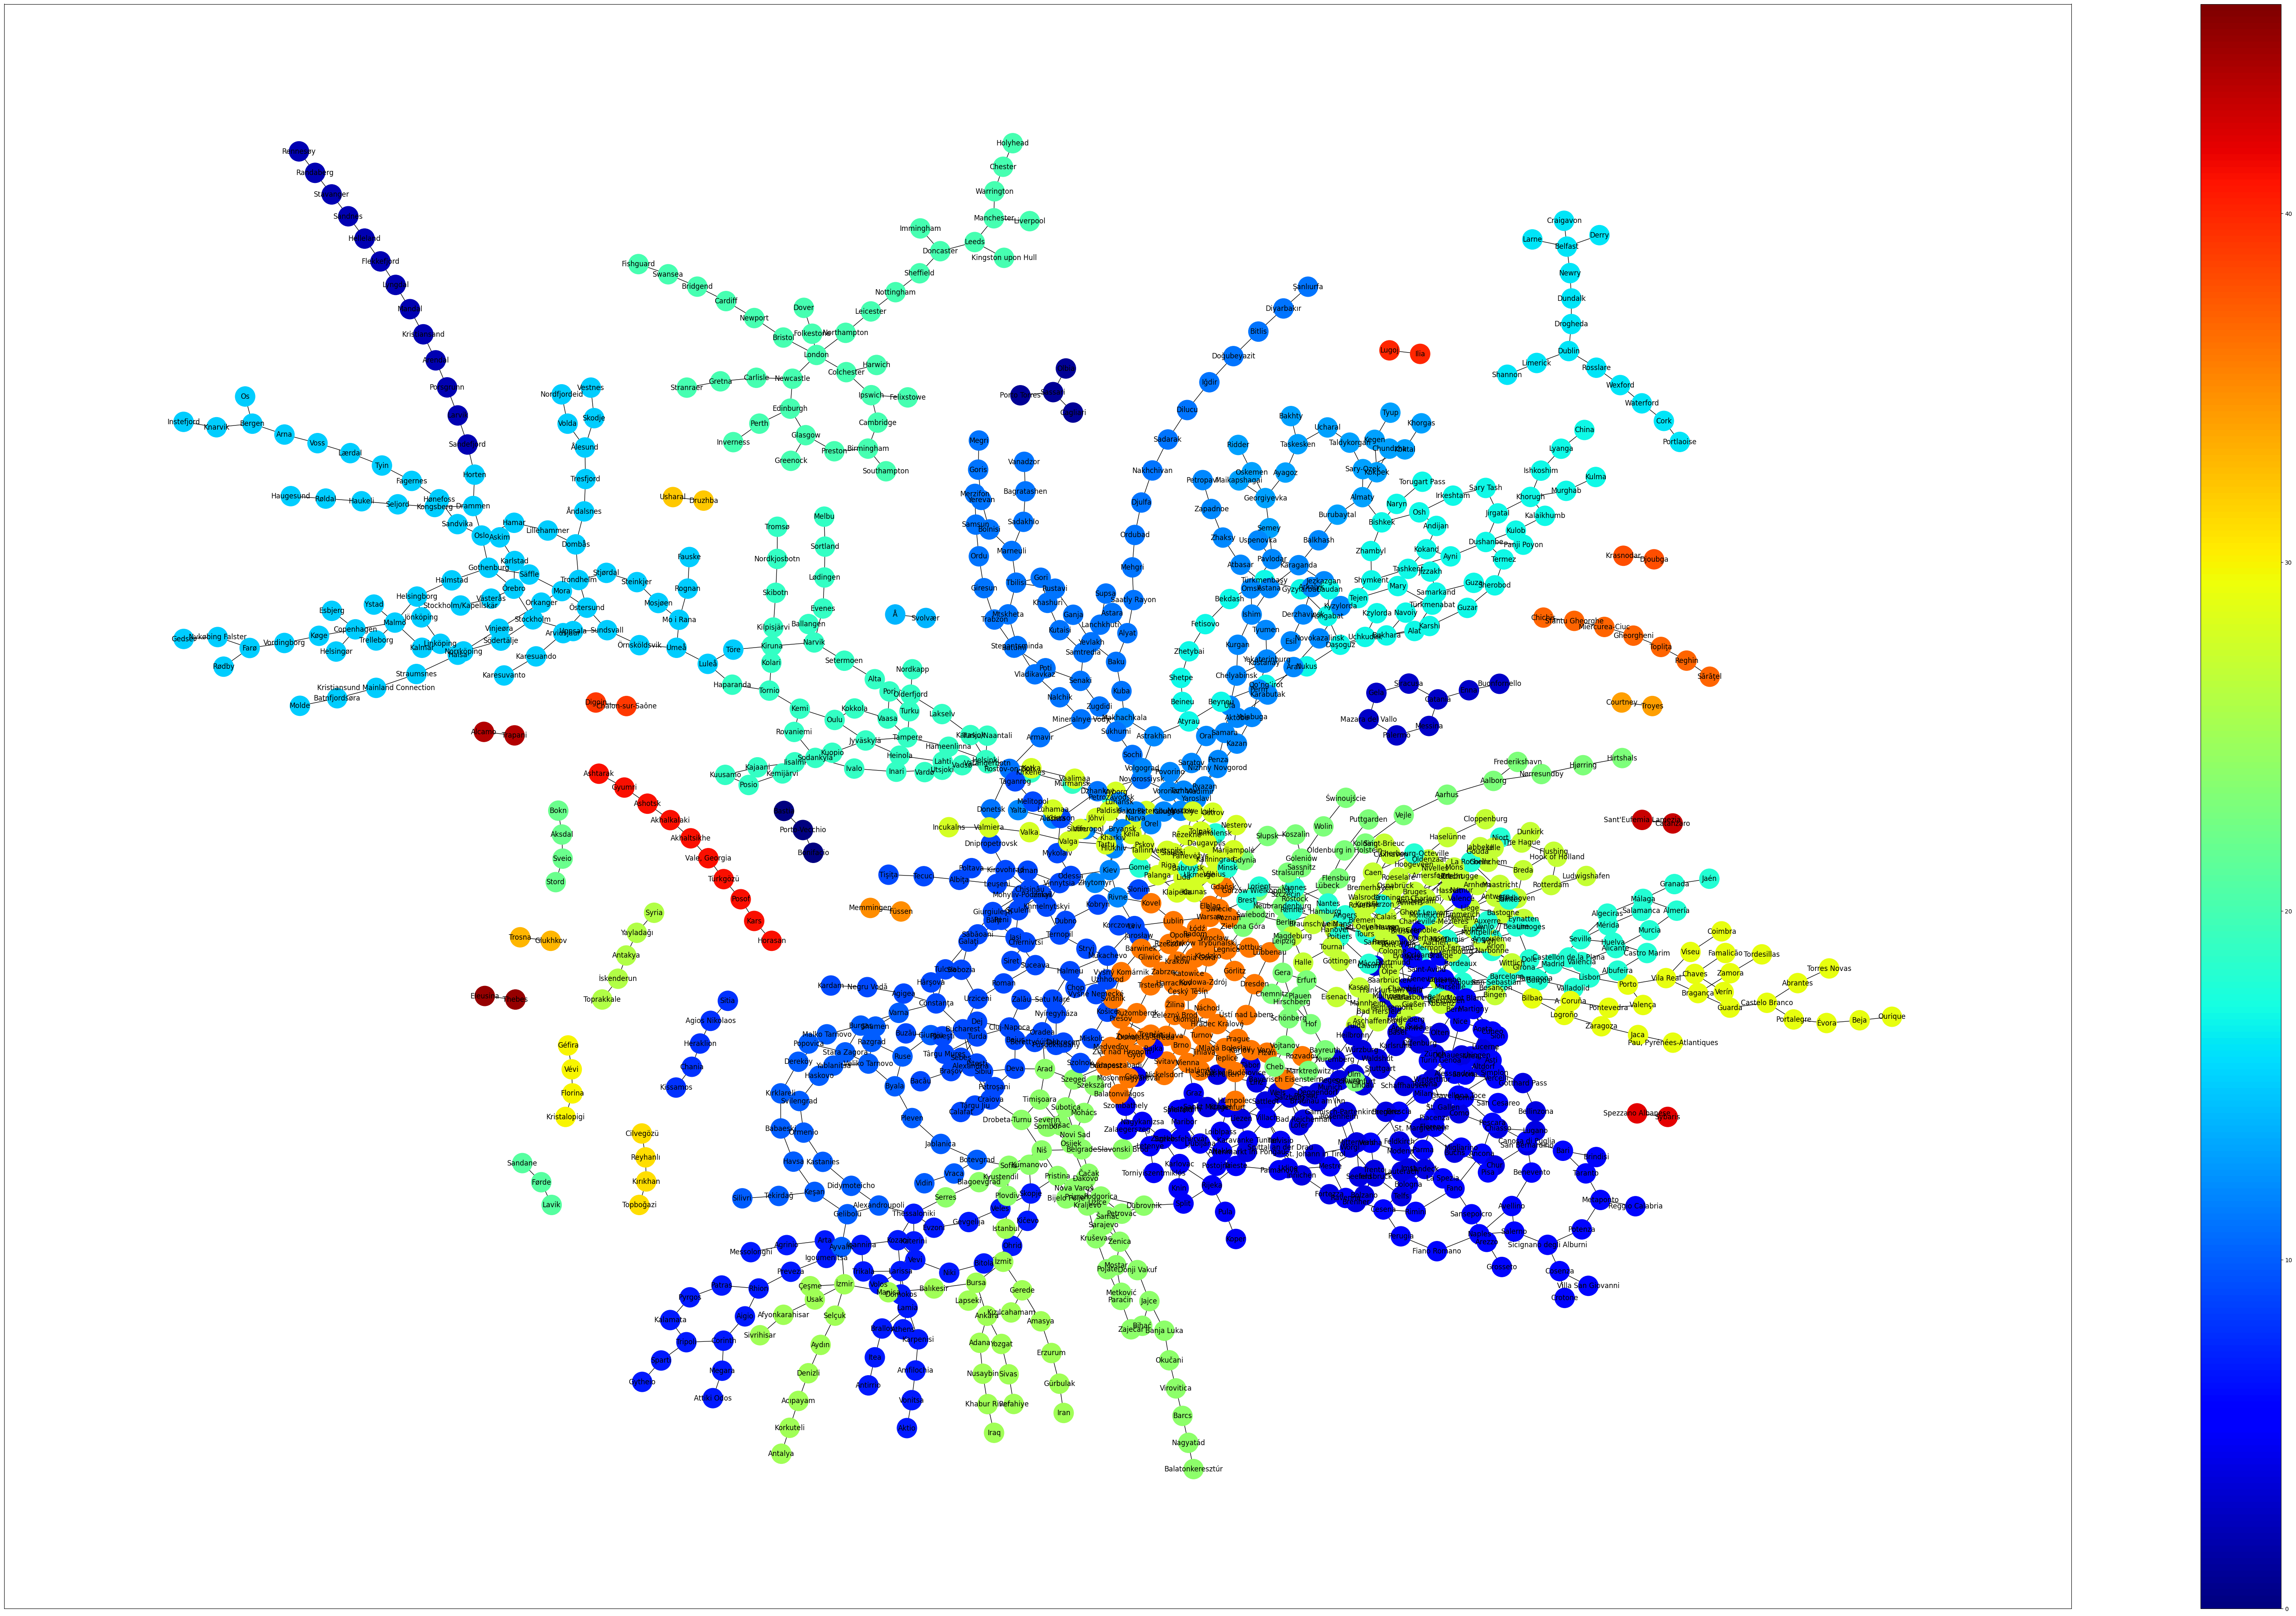

In [ ]:
fig = plt.figure(figsize=(80, 50))

pos = graphviz_layout(G)

im = nx.draw_networkx_nodes(G, pos, node_size=len(G.nodes()),
                            node_color=color_list_community, cmap='jet', vmin=0,
                            vmax=len(partition))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=12, font_color="black")

plt.xticks([])
plt.yticks([])
plt.colorbar(im)
plt.show(block=False)

## 6. Evaluation

In [ ]:
# Calculate modularity of partition
mod = community.modularity(G, partition)
print("Modularity of all partitions detected is", mod)

Modularity of all partitions detected is 0.8761896200437372


In [ ]:
# Calculate coverage and performance of partition
(cov, perf) = community.partition_quality(G, partition)
print("Coverage of all partitions detected is", cov)
print("Performance of all partitions detected is", perf)

Coverage of all partitions detected is 0.926605504587156
Performance of all partitions detected is 0.9575630563313393


In [ ]:
# Evaluate using Adjusted Rand Index (ARI) metric
ari = metrics.adjusted_rand_score()

In [ ]:
# Evaluate using Adjust Mutual Information (AMI) metric
ami = metrics.adjusted_mutual_info_score()